# Vantage keyword analysis

An analysis to identify the most import/common keywords and bi-grams in Vantage articles between Nov 2019 and Oct 2020.

In [1]:
import pandas as pd
#import story contents
pvdata = pd.read_csv(r'C:\Users\EdwinE\.spyder-py3\Vantage article analysis\pageviews.csv')   
output = pd.read_csv(r'C:\Users\EdwinE\.spyder-py3\Vantage article analysis\sentimentoutput.csv')
#merge pageviews with text data
alldata = output.merge(pvdata,on='URL')
alldata = alldata.drop(['Unnamed: 0'], axis =1)
alldata['Pageviews'] = alldata['Pageviews'].replace({',':''},regex=True).apply(pd.to_numeric,1)
output=alldata
output = output.dropna()
#have to drop medtech as they have different lingo
nomedtech = output[~output['tags'].str.contains("Medtech")]
nomedtech = nomedtech.reset_index(drop = True)

Obviously, the text needs some working before anything useful can be gained from it. So let's process the data.

In [2]:
# Import libraries for text preprocessing
import re
import nltk

# You only need to download these resources once. After you run this 
# the first time--or if you know you already have these installed--
# you can comment these two lines out (with a #)
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

textcol= nomedtech['text']
##most and least common words pre-processing
#Top 10
freq = pd.Series(' '.join(map(str, nomedtech['text'])).split()).value_counts()[:10]
print(freq)
#bottom 10
freq1 = pd.Series(' '.join(map(str, nomedtech['text'])).split()).value_counts()[:-10]
print(freq1)
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
stop_words.add('also')
stop_words.add('could')

# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
nomedtech['word_count'] = nomedtech['text'].apply(lambda x: len(str(x).split(" ")))
ds_count = len(nomedtech.word_count)

for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(nomedtech['text'][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)


# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EdwinE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EdwinE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


the     10484
of       5825
to       5375
a        5174
in       4928
and      3981
is       3459
that     2596
for      2269
with     1971
dtype: int64
the              10484
of                5825
to                5375
a                 5174
in                4928
                 ...  
signalled            1
dish                 1
Acing                1
questionable;        1
elsewhere,           1
Length: 24439, dtype: int64


    Keyword  Frequency
0     trial       1138
1      year        979
2      data        976
3   company        966
4     study        956
5   patient        943
6     phase        667
7   project        559
8      drug        543
9       two        536
10    first        529
11      one        500
12   market        483
13       bn        455
14   cancer        431
15    might        423
16    month        407
17    covid        404
18   result        387
19    group        385


[Text(0, 0, 'trial'),
 Text(0, 0, 'year'),
 Text(0, 0, 'data'),
 Text(0, 0, 'company'),
 Text(0, 0, 'study'),
 Text(0, 0, 'patient'),
 Text(0, 0, 'phase'),
 Text(0, 0, 'project'),
 Text(0, 0, 'drug'),
 Text(0, 0, 'two'),
 Text(0, 0, 'first'),
 Text(0, 0, 'one'),
 Text(0, 0, 'market'),
 Text(0, 0, 'bn'),
 Text(0, 0, 'cancer'),
 Text(0, 0, 'might'),
 Text(0, 0, 'month'),
 Text(0, 0, 'covid'),
 Text(0, 0, 'result'),
 Text(0, 0, 'group')]

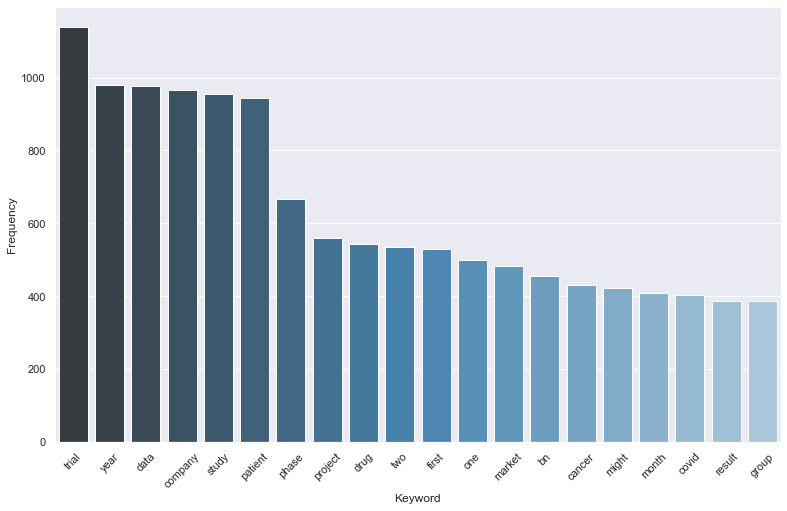

In [5]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)


                     Bi-gram  Frequency
0                   phase ii        267
1                  phase iii        251
2           primary endpoint        164
3                  last year        164
4                 first line        108
5                 market cap         97
6                  next year         88
7             clinical trial         85
8               gene therapy         85
9              covid vaccine         84
10             adverse event         83
11            versus placebo         82
12                  merck co         82
13  according evaluatepharma         78
14               share price         75
15             bristol myers         75
16              myers squibb         71
17                 iii trial         70
18             response rate         70
19                big pharma         67


[Text(0, 0, 'phase ii'),
 Text(0, 0, 'phase iii'),
 Text(0, 0, 'primary endpoint'),
 Text(0, 0, 'last year'),
 Text(0, 0, 'first line'),
 Text(0, 0, 'market cap'),
 Text(0, 0, 'next year'),
 Text(0, 0, 'clinical trial'),
 Text(0, 0, 'gene therapy'),
 Text(0, 0, 'covid vaccine'),
 Text(0, 0, 'adverse event'),
 Text(0, 0, 'versus placebo'),
 Text(0, 0, 'merck co'),
 Text(0, 0, 'according evaluatepharma'),
 Text(0, 0, 'share price'),
 Text(0, 0, 'bristol myers'),
 Text(0, 0, 'myers squibb'),
 Text(0, 0, 'iii trial'),
 Text(0, 0, 'response rate'),
 Text(0, 0, 'big pharma')]

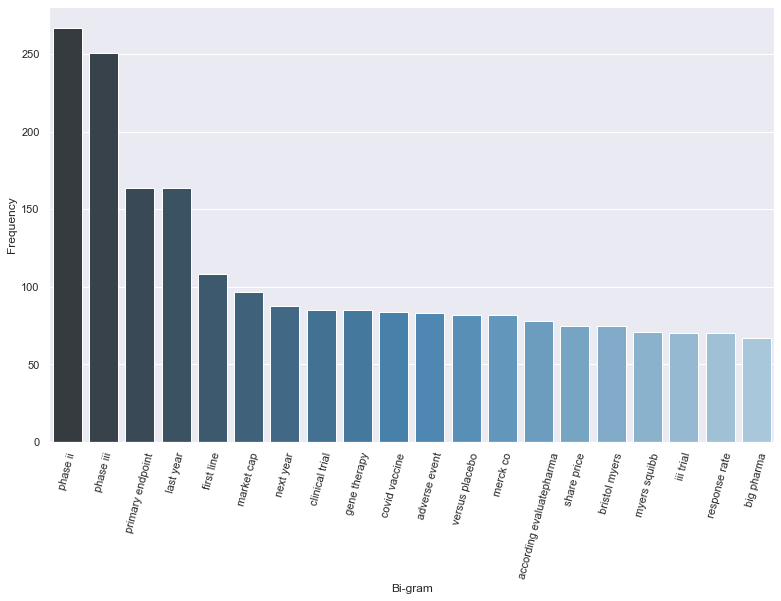

In [6]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)

In [ ]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)


In [8]:
#Get TF-IDF (term frequency/inverse document frequency) -- 
# TF-IDF lists word frequency scores that highlight words that 
# are more important to the context rather than those that 
# appear frequently across documents
topstories = nomedtech.nlargest(40,'Pageviews')
topstories = topstories.reset_index()
topstories['dist'] = 397-topstories['index']
keyword=[]
keyvalue=[]

from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
    # Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted


for x in topstories['dist']:
    doc=corpus[ds_count-x]
     
    # Generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    
    
    # Sort tf_idf in descending order
    from scipy.sparse import coo_matrix
    def sort_coo(coo_matrix):
        tuples = zip(coo_matrix.col, coo_matrix.data)
        return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
     
    def extract_topn_from_vector(feature_names, sorted_items, topn=25):
        
        # Use only topn items from vector
        sorted_items = sorted_items[:topn]
        score_vals = []
        feature_vals = []
        
        # Word index and corresponding tf-idf score
        for idx, score in sorted_items:
            
            # Keep track of feature name and its corresponding score
            score_vals.append(round(score, 3))
            feature_vals.append(feature_names[idx])
     
        # Create tuples of feature,score
        # Results = zip(feature_vals,score_vals)
        results= {}
        for idx in range(len(feature_vals)):
            results[feature_vals[idx]]=score_vals[idx]
        return results
    
    # Sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    
    # Extract only the top n; n here is 25
    keywords=extract_topn_from_vector(feature_names,sorted_items,25)
     
    # Print the results, save as CSV
    print("\nAbstract:")
    print(doc)
    print("\nKeywords:")
    for k in keywords:
        print(k,keywords[k])
        keyword.append(k)
        keyvalue.append(keywords[k])
        

##count repeated keywords      
from collections import Counter  
kwcount = Counter(keyword)
kwcounts=pd.DataFrame.from_dict(kwcount, orient='index').reset_index()
kwcounts.columns = ['word','count']
kwcounts = kwcounts.sort_values(by=['count'])
kwcount20=kwcounts.tail(20)
bgcount = kwcounts[kwcounts['word'].str.contains(r' ', na=True)]

sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="word", y="count", data=kwcount20, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)




Abstract:
easy dismiss many publicity seeking announcement related covid past two week beyond hype active progress made last several potential treatment led gilead remdesivir clinic mrna vaccine moderna week dosed first study subject first antibody therapeutic still planning stage interesting theory developing around il inhibition something resulted role proposed roche actemra sanofi regeneron kevzara excitement il already seen tiziana jump bandwagon tiziana take deep breath target covid march spurred addition actemra rheumatoid arthritis drug chinese guideline basis covid patient respond infection overproducing il two day ago sanofi regeneron said starting phase ii iii trial anti il mab kevzara clearly side effect drug kevzara acetmra carry black box warning risk serious infection patient pulmonary disease need closely monitored another emergency measure saw china add favipiravir covid treatment programme flu drug sold japan taisho fujifilm avigan discontinued virtually everywhere el


Abstract:
clinical development tackling covid pandemic moved pace first biopharma project recently entered trial already first clinical data albeit academic centre emerged true result concerning flu antiviral avigan anti hiv combination kaletra antimalarial plaquenil highly equivocal come range caveat represent first hint covid tackled dampen severity disease serve important guide industry already evident existing antiviral might form first line attack people infected covid even activity limited blunting course disease covid treatment plan slowly emerges march first clinical data gilead remdesivir due may keenly awaited interest grown around avigan taisho fujifilm drug available treating flu japan since added china emergency covid treatment programme yesterday chinese authority published first evidence avigan efficacy coronavirus face data positive avigan treated patient clearing virus four day versus day given lopinavir however subject enrolled randomised fashion got additional backg

In [9]:
#### get top 20 keywords for each article and map to pageviews.
allstories = nomedtech
allstories = allstories.reset_index()
allstories['dist'] = 397-allstories['index']
keyword=[]
keyvalue=[]
articleurl=[]
pageviews=[]
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
    
    # Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted


for x in allstories.itertuples():
    doc=corpus[ds_count-int(x.dist)]
     
    # Generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    
    
    # Sort tf_idf in descending order
    from scipy.sparse import coo_matrix
    def sort_coo(coo_matrix):
        tuples = zip(coo_matrix.col, coo_matrix.data)
        return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
     
    def extract_topn_from_vector(feature_names, sorted_items, topn=25):
        
        # Use only topn items from vector
        sorted_items = sorted_items[:topn]
        score_vals = []
        feature_vals = []
        
        # Word index and corresponding tf-idf score
        for idx, score in sorted_items:
            
            # Keep track of feature name and its corresponding score
            score_vals.append(round(score, 3))
            feature_vals.append(feature_names[idx])
     
        # Create tuples of feature,score
        # Results = zip(feature_vals,score_vals)
        results= {}
        for idx in range(len(feature_vals)):
            results[feature_vals[idx]]=score_vals[idx]
        return results
    
    # Sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    
    # Extract only the top n; n here is 25
    keywords=extract_topn_from_vector(feature_names,sorted_items,20)
     
    # Print the results, save as CSV
    print("\nAbstract:")
    print(doc)
    print("\nKeywords:")
    for k in keywords:
        print(k,keywords[k])
        keyword.append(k)
        keyvalue.append(keywords[k])
        articleurl.append(x.URL)
        pageviews.append(x.Pageviews)


Abstract:
aptinyx share price doubled pre market trading reported phase ii data nmda receptor modulator nyx patient post traumatic stress disorder closer examination data included press release however reveals readout clear investor might hope component primary endpoint reached significance even dos stage trial aptinyx determined head pivotal trial group contention data validate nmda receptor modulation platform look little optimistic aptinyx needed pretty unequivocal hit phase ii study wanted restore confidence novel approach hitting nmda target knocked badly failure similarly acting nyx diabetic peripheral neuropathy start last year appear obtained one phase ii ptsd study sequential parallel comparison design method developed reduce high placebo response often seen cns drug study conducted two placebo controlled stage respond placebo first stage removed final analysis given placebo stage one respond randomised drug placebo data patient considered analysis stage two aptinyx trial res


Abstract:
delving key catalyst due big pharma biotech company evaluate vantage look smallest player market cap bn novel approach oncology one focus underserved neurological condition rett angelman syndrome another area interest notably almost half company list gone public past two year upcoming clinical readout provide investor initial glimpse whether money well spent one company replimune completed ipo towards end year investor see early data two oncolytic immunotherapy rp company lead project version hsv type engineered replicate tumour rp armed two gene one encoding fusogenic protein enhance cell death encoding gm csf cytokine believed aid immune activation rp derivative rp express anti ctla antibody like molecule updated result due phase ii study testing rp opdivo earlier data skin cancer expansion cohort encouraging albeit small number patient relatively short follow objective response rate seen cutaneous squamous cell carcinoma comprising four complete two partial response orr o

four 0.09
asco 0.088
update 0.087
saying 0.086
rate 0.086

Abstract:
pfizer sangamo long positioned haemophilia gene candidate giroctocogene fitelparvovec best class new long term data suggest efficacy might waning difficult draw firm conclusion latest result encompass five patient something doubt watched upcoming phase iii trial particularly question durability tripped biomarin rival gene therapy roctavian new data giroctocogene fitelparvovec previously known sb came pfizer r yesterday chart show factor viii level year five patient phase ii alta trial receiving highest dose x vg kg

Keywords:
giroctocogene fitelparvovec 0.29
giroctocogene 0.29
fitelparvovec 0.29
five patient 0.269
gene 0.154
viii 0.145
factor viii 0.145
vg kg 0.139
vg 0.139
pfizer sangamo 0.139
five 0.138
pfizer 0.136
positioned 0.135
waning 0.131
latest result 0.131
sangamo 0.127
patient phase ii 0.127
haemophilia gene 0.127
sb 0.124
chart show 0.121

Abstract:
recently covid vaccine grabbing headline monoclonal anti


Abstract:
latest scientific paper preprint typical way covid vaccine data released shed light biontech pfizer decision take bnt b phase iii thing already moved investor focus next trigger fast moving field including pivotal data astrazeneca azd first phase result crop relative laggard including curevac glaxosmithkline johnson johnson last notable week raising target enrolment proposed phase iii study massive volunteer ensemble pivotal trial j j ad cov previously thought starting september clinicaltrials gov entry revealed double enrolment target across hospital u south america south africa philippine ukraine start date september phase iii study astra azd way four day ago high risk individual formal primary completion date december analyst believe initial result first data pivotal covid vaccine study come sooner perhaps october meanwhile fourth quarter see pivotal data moderna mrna biontech pfizer bnt b well perhaps novavax nvx cov though like ad cov last begin phase iii next month nvx


Abstract:
often cosy world patented drug development price war rare yet working similarly acting version biopharma expensive treatment launching discount precisely aim eqrx private biotech founded january yesterday company trained gun first target strategy pfizer cdk inhibitor ibrance breast cancer astrazeneca egfr targeting lung cancer drug tagrisso end eqrx licensed two early stage project mechanism g lerociclib jiangsu hansoh almonertinib respectively still leader probably panic yet take eqrx year develop asset fast follower plan depends stellar clinical data without big hitting sale machine behind eqrx little chance dislodging entrenched product even cut price approach lerociclib lerociclib deal cost eqrx signing give company right cdk inhibitor globally including japan excluding rest asia pacific region g earlier struck deal genor biopharma lerociclib one g two cdk inhibitor might first seem strange originator willing cut throat threat discounted pricing g positioned project tril

silon 0.117
cardiologist 0.11
ada 0.097
dr 0.092
failure 0.09
study 0.084
type 0.083

Abstract:
yesterday clinical trial success relugolix give myovant lead project second knockout hit endometriosis third possible indication albeit combination hormone replacement battle three gnrh antagonist relugolix chance catch abbvie orilissa launched first disappointed monotherapy investor might wondering trade news myovant stock closed yesterday giving bn market cap position sumitomo dainippon pharma intriguing japanese group last september paid roivant bn various subsidiary including myovant stake currently valued bn suggests myovant still account relatively small part valuation sumitomo struggling patent expiry clinical failure one solution sumitomo buy myovant gain full benefit relugolix doubt takeout thesis underpins much smaller company valuation bn clear much relugolix value market factor however sellside consensus amount product npv bn computed evaluatepharma analyst assign forecast revenu


Abstract:
gilead investor used group antiviral remdesivir generating confusing contradictory datasets proved today study moderately ill covid patient delivered supposed win five day course drug perversely day regimen show significant benefit extent matter separate point course remdesivir already available u emergency use authorisation measure tackle coronavirus pandemic borderline efficacy suggested latest dataset clearly come short expectation gilead sat share price gain year date opened moderate covid result came month gilead trial severely ill subject suggested five day course remdesivir might helpful day treatment big caveat study control cohort wind change gilead remdesivir april mix clearly negative remdesivir study china robust controlled design terminated early anecdotal data emergency access positive trial run niaid last far biggest remdesivir dataset perhaps limited adaptive design latest finding gilead study moderately ill patient add understanding probably remdesivir activ


Abstract:
first phase iii data roche ulcerative colitis programme etrolizumab come mid year five study run etrolizumab comfortably able demonstrate utility placebo controlled trial face tougher task come active control case remicade humira targeting integrins new mechanism gastrointestinal agent takeda entyvio alpha beta integrin antibody market ulcerative colitis crohn disease however etrolizumab novel target second integrin pivotal programme need show bestows important differentiation initial result one roche phase iii study hickory emerged tested etrolizumab versus placebo patient mild moderate ulcerative colitis failed respond anti tnf therapy open label induction cohort subject etrolizumab associated week clinical response patient patient improvement least one point baseline endoscopic score etrolizumab well tolerated frequency adverse event comparable placebo takeda entyvio approved ulcerative colitis based two integrated placebo controlled study total patient response rate week


Abstract:
putting finerenone patient pivotal programme diabetic kidney disease looked like bold bet back bayer first started study five year later sglt inhibitor way establishing beneficial class effect setting risk move never pay even greater become clearer data start emerge two phase iii trial topline result first fidelio dkd due second quarter figaro dkd read early next year bayer trying show finerenone reduce patient risk kidney failure cardiovascular death study pit pill placebo result held invokana record invokana johnson johnson sglt inhibitor last year became first drug class win approval reduce risk end stage kidney disease cardiovascular event diabetic chronic kidney disease around diabetic develop nephropathy progressive destruction kidney patient high risk cardiac complication kidney failure difference study invokana approval credence finerenone programme complicates cross trial comparison certain data point used yardstick however particular invokana reduction risk end sta


Abstract:
regulatory delay growing ever likely threat coronavirus ramp globally u fda announced earlier month postponing certain manufacturing facility inspection advisory committee meeting cancelled drug approval surely next hit vantage took look u regulatory decision remaining month expected april bellwether future regulatory landscape closely watched include panel intercept nash project approval decision bristol multiple sclerosis asset ozanimod mizuho analyst note ozanimod manufacturing inspection probably occurred month ago review likely unaffected website new product named zeposia already live celgene holder eager hear decision ozanimod part contingent value right pay drug approved end fda told mizuho cder remains fully capable continue daily activity drug review business usual seems though presumably change condition worsen significantly u ema previously said committee meeting would held virtually end april fda said possible host meeting remotely several already postponed inter

infectious disease 0.076
debt 0.076
grow 0.074
next generation 0.073
infectious 0.071
acquisition 0.067
said 0.065
third 0.064

Abstract:
daniel day appointed chief executive gilead last year spoken judging company bn acquisition forty seven today message clear gilead want boost place oncology prepared pay top dollar immediate beneficiary though much lower base forty seven cd focused peer trillium stand since bloomberg thursday broke news forty seven acquired news le good cell therapy company iovance rumoured gilead crosshairs far left cold one surprising aspect forty seven buyout year ago targeting cd novel immuno oncology mechanism looked dead buried celgene terminated anti cd mab cc forty seven magrolimab stood pack posting highly promising myelodysplastic syndrome md data last year ash meeting indeed ash data seem triggered today buyout forty seven buck trend january analyst call today mr day said present meeting particularly impressed saw forty seven cash bn price valuing forty se

sitravatinib 0.154
exelixis 0.128
cabometyx 0.128
saturday 0.123
mk 0.123
cancer 0.114
presentation 0.113
data cut 0.098
treatment related death 0.091
related death 0.091
orr 0.088

Abstract:
sometimes thing go well biotech occasionally work brilliantly vtv therapeutic pivot type diabetes two year ago rewarded phase ii study win yesterday prompting share price surge luck would vtv second reason celebrate decision abandon alzheimer entirely played straight space novo nordisk recently drumming investor interest vtv still well high enjoyed piece place comeback comeback see vtv capitalise putative link alzheimer disease diabetes novo glp analogue diabetes victoza soon test imperial college elad trial whose readout due imminently novo nordisk quiet entry year alzheimer january heart hypothesis lie claim neurodegeneration linked low insulin insulin resistance however speculative might novo stock year date spike analyst put excitement elad readout elevage vtv evidence emerge first half next y


Abstract:
financing climate young drug maker cooled last year cash far scarce anything major concern heard private investor moment long term implication excess capital sign restraint however average financing size dipped peak remained record level frequency mega round amassed barely slowed point even pronounced concentration capital hand shrinking number start ups count round raised fell last year first time since least according evaluatepharma analysis look drug developer excluding medtech diagnostics genomics example represents look many would consider high risk end biopharma sector long equity investor industry display clear interest fledgling developer seems unlikely venture firm fret much apparent shrinking gene pool focusing capital reflects shift investment strategy widely embraced company builder describe allows start ups properly funded given best chance success evidence strategy working median time exit via measured date company foundation buyout dipped noticeably time ipo h

disclosure 0.101
gene 0.1
expression 0.093
fact 0.084
increased 0.081

Abstract:
red hot therapy area nash mired clinical setback week added two disappointment today boehringer ingelheim canned one many deal space two day gilead revealed multi project atlas study failed true gilead setback great surprise separate positive development poxel today claimed early clinical nash win riskiest bet remains genfit whose future hang balance crucial pivotal study elafibranor due yield result early next year though genfit bullish retail follower remain convinced success resolve trial industry numerous nash failure contributed french group stock declining year date cymabay genfit band play november fear interaction latest boehringer aoc inhibitor bi german group today discontinued nash owing risk drug drug interaction decision taken spite ostensibly positive phase iia trial based assessment another recently completed phase study boehringer said group licensed bi pharmaxis front part push nash saw si

survival 0.113
triple combo 0.109
pancreatic 0.105
line 0.103
month 0.1
lowest 0.1
response rate 0.097
biomarin 0.091

Abstract:
david chang saw end goal early chief medical officer kite pharma company ever allogeneic cell therapy deal ucla secure supply pluripotent stem cell chief executive allogene repeated trick licensing notch therapeutic stem cell technology month speaking vantage week jefferies conference london mr chang said within month allogene creation recognised need secure cell supply course done kite allogeneic cell therapy company point start thinking renewable cell source state since approval kymriah yescarta development autologous cell therapy product stalled many investor see allogeneic shelf therapy breakthrough move needle however first generation allogeneic player hit production bottleneck struggled cell derived healthy donor tend heterogeneous variable quality needed goal produce reliable universal product single cell using induced pluripotent stem cell ipscs sourc

In [11]:
#joing the lists

combdata = pd.DataFrame(list(zip(keyword, keyvalue, articleurl,pageviews)), 
               columns =['word', 'value','url','pageviews'])
combdata.to_csv('top20keywords.csv')
print(combdata)
pvmeans = combdata.groupby('word')['pageviews'].mean().reset_index()
pvcount = combdata.groupby('word')['value'].count().reset_index()
pvalldata = pvmeans.merge(pvcount,on='word')
pvalldata.to_csv('avgpageviewkeywords.csv')
print(pvalldata)

              word  value                                                url  \
0        stage one  0.322  https://www.evaluate.com/vantage/articles/news...   
1            stage  0.297  https://www.evaluate.com/vantage/articles/news...   
2        stage two  0.258  https://www.evaluate.com/vantage/articles/news...   
3          aptinyx  0.241  https://www.evaluate.com/vantage/articles/news...   
4     significance  0.206  https://www.evaluate.com/vantage/articles/news...   
...            ...    ...                                                ...   
7935       placebo  0.050  https://www.evaluate.com/vantage/articles/news...   
7936       getting  0.049  https://www.evaluate.com/vantage/articles/news...   
7937         group  0.048  https://www.evaluate.com/vantage/articles/news...   
7938          look  0.046  https://www.evaluate.com/vantage/articles/news...   
7939          find  0.046  https://www.evaluate.com/vantage/articles/news...   

      pageviews  
0           281  
1  